Library and Directory Setup

In [1]:
options(warn=-1)

In [2]:
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(plotly))
suppressPackageStartupMessages(library(VennDiagram))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggridges))
suppressPackageStartupMessages(library(wesanderson))
library(Cairo)

In [3]:
setwd("F:/Thesis/Working_Data/Final")
getwd()

[1] "F:/Thesis/Working_Data/Final"

# 1) Industrial-Patent Dataset

## 1.0) Input

In [4]:
Industrial_Patent_Dataset <- fread("Industrial_Patent_Dataset.csv", stringsAsFactors = FALSE, na.strings="")
dim(Industrial_Patent_Dataset)

[1] 19602    54

Adjust Data Type

In [5]:
sapply(Industrial_Patent_Dataset,class)

Patent_number                        Application_Date 
                            "character"                             "character" 
                             Clean_name                    APPLICANT_MATCH_NAME 
                            "character"                             "character" 
                      PDL_ORIGINAL_NAME                          PDL_MATCH_NAME 
                            "character"                             "character" 
                                 METHOD                        Person_ctry_code 
                            "character"                             "character" 
                                COUNTRY                          Applicant_Type 
                            "character"                             "character" 
                           YEAR_FOUNDED                              SIZE_RANGE 
                              "integer"                             "character" 
                               INDUSTRY                               GPT_Scope 
                            "character"                             "character" 
                                   Year                           Applicant_Age 
                              "integer"                               "integer" 
                            Agriculture                     Arts and Humanities 
                              "integer"                               "integer" 
                    Banking and Finance                                Business 
                              "integer"                               "integer" 
                            Cartography                         Computer Vision 
                              "integer"                               "integer" 
                Computing in Government                         Control Methods 
                              "integer"                               "integer" 
    Distributed Artificial Intelligence Document Management and Text Processing 
                              "integer"                               "integer" 
                              Education                       Energy Management 
                              "integer"                               "integer" 
                          Entertainment                             Fuzzy Logic 
                              "integer"                               "integer" 
 Knowledge Representation And Reasoning      Law Social and Behavioral Sciences 
                              "integer"                               "integer" 
              Life and Medical Sciences                       Logic Programming 
                              "integer"                               "integer" 
                       Machine Learning                                Military 
                              "integer"                               "integer" 
            Natural Language Processing                                Networks 
                              "integer"                               "integer" 
                   Ontology Engineering       Personal Devices Computing and Hc 
                              "integer"                               "integer" 
      Physical Sciences and Engineering                 Planning and Scheduling 
                              "integer"                               "integer" 
                   Predictive Analytics                 Probabilistic Reasoning 
                              "integer"                               "integer" 
                             Publishing                                Robotics 
                              "integer"                               "integer" 
                         Search Methods                                Security 
                              "integer"                               "integer" 
                      Speech Processing                      Telecommunications 
                              "integer"                  

In [6]:
Industrial_Patent_Dataset$Application_Date <- lubridate::ymd(Industrial_Patent_Dataset$Application_Date)

Check range of Application_Date

In [7]:
range(Industrial_Patent_Dataset$Application_Date) 
range(Industrial_Patent_Dataset$Year)

[1] "1978-12-30" "2018-12-31"

[1] 1978 2018

Join features into groups

In [8]:
Features <- colnames(Industrial_Patent_Dataset)
General_Features <- Features[1:16]
Category_Features <- Features[(length(Features)-2):(length(Features))]
Field_Features <- Features[17:(length(Features)-3)]

General_Features
Category_Features
Field_Features

[1] "Patent_number"        "Application_Date"     "Clean_name"          
 [4] "APPLICANT_MATCH_NAME" "PDL_ORIGINAL_NAME"    "PDL_MATCH_NAME"      
 [7] "METHOD"               "Person_ctry_code"     "COUNTRY"             
[10] "Applicant_Type"       "YEAR_FOUNDED"         "SIZE_RANGE"          
[13] "INDUSTRY"             "GPT_Scope"            "Year"                
[16] "Applicant_Age"

[1] "Field_Applications"      "Functional_Applications"
[3] "Techniques"

[1] "Agriculture"                            
 [2] "Arts and Humanities"                    
 [3] "Banking and Finance"                    
 [4] "Business"                               
 [5] "Cartography"                            
 [6] "Computer Vision"                        
 [7] "Computing in Government"                
 [8] "Control Methods"                        
 [9] "Distributed Artificial Intelligence"    
[10] "Document Management and Text Processing"
[11] "Education"                              
[12] "Energy Management"                      
[13] "Entertainment"                          
[14] "Fuzzy Logic"                            
[15] "Knowledge Representation And Reasoning" 
[16] "Law Social and Behavioral Sciences"     
[17] "Life and Medical Sciences"              
[18] "Logic Programming"                      
[19] "Machine Learning"                       
[20] "Military"                               
[21] "Natural Language Processing"            
[22] "Networks"                               
[23] "Ontology Engineering"                   
[24] "Personal Devices Computing and Hc"      
[25] "Physical Sciences and Engineering"      
[26] "Planning and Scheduling"                
[27] "Predictive Analytics"                   
[28] "Probabilistic Reasoning"                
[29] "Publishing"                             
[30] "Robotics"                               
[31] "Search Methods"                         
[32] "Security"                               
[33] "Speech Processing"                      
[34] "Telecommunications"                     
[35] "Transportation"

## 1.1) Patent Applications per Year

Total Applications

In [9]:
Total_Applications <- length(unique(Industrial_Patent_Dataset$Patent_number))
Total_Applications

[1] 16971

Patent applications by year

In [10]:
#Group patent applications by year
ByYear <- unique(Industrial_Patent_Dataset, by=c("Patent_number"))
ByYear <- ByYear[, .N, by = "Year"]
ByYear <-ByYear[order(ByYear[,"Year"]),]
colnames(ByYear)[2] <- "Number_Patents"

head(ByYear)
sapply(ByYear, class)

Year,Number_Patents
1978,1
1981,1
1982,6
1983,3
1984,10
1985,11


Year Number_Patents 
     "integer"      "integer"

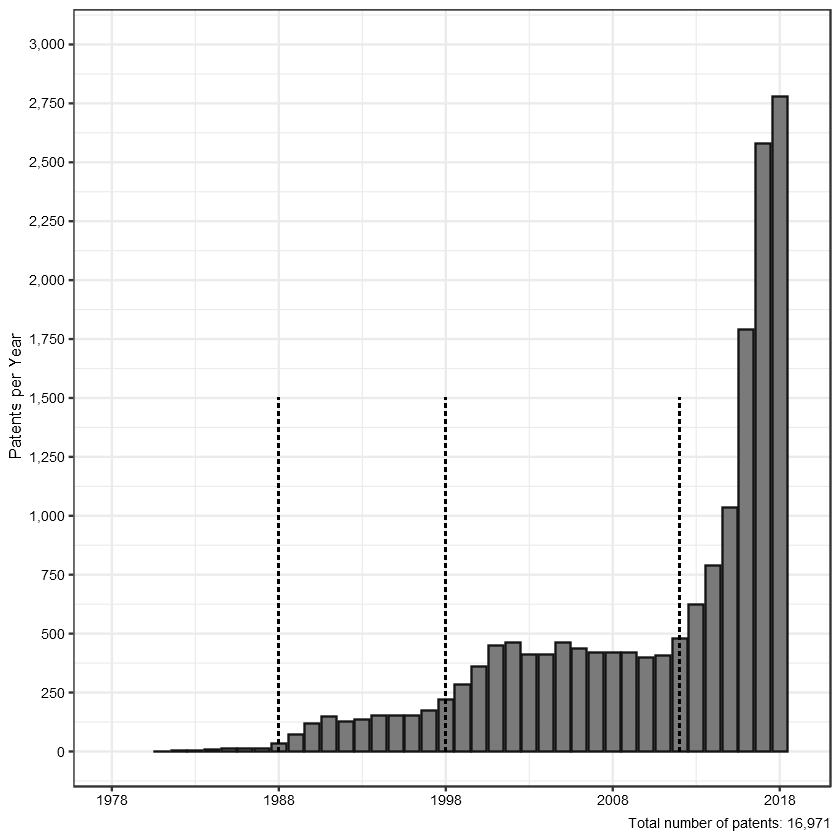

In [12]:
Yearly_Applications <- ggplot(ByYear, aes(x=Year, y=Number_Patents)) +
      labs(caption="Total number of patents: 16,971") + 
      geom_bar(stat="identity", colour="gray8", fill="gray48") +
      geom_segment(aes(x=1988, xend=1988, y=0, yend=1500), color="black", linetype="dashed", size=0.5) + 
      geom_segment(aes(x=1998, xend=1998, y=0, yend=1500), color="black", linetype="dashed", size=0.5) + 
      geom_segment(aes(x=2012, xend=2012, y=0, yend=1500), color="black", linetype="dashed", size=0.5) + 
      scale_x_continuous(name=NULL, limits = c(1977.75,2019), breaks=seq(1978,2018,10)) + 
      scale_y_continuous(name="Patents per Year", limits=c(0,3000), breaks=seq(0,3000,250),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      theme_bw()+
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Yearly_Applications

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine
ggsave(plot=Yearly_Applications,
       filename="Yearly_Applications.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 1.2) Category and Field Distribution: Overlap Analysis

### 1.2.1) Category Level

Subset patents depending on category

In [13]:
Category_Overlap <- unique(Industrial_Patent_Dataset, by=c("Patent_number"))
Tech <- Category_Overlap[Techniques=="1", Patent_number]
FuA <- Category_Overlap[Functional_Applications=="1", Patent_number]
FiA <- Category_Overlap[Field_Applications=="1", Patent_number]

Category VennDiagram. Diagram available in "Charts/Final/Descriptive_Analysis"

In [14]:
venn.diagram(
      x=list(Tech, FuA, FiA),
      cex=0.75,
      category.names = c("Technique", "Functional Application", "Field Application"),
      cat.default.pos = "outer",
      cat.cex  = c(0.85, 0.85, 0.85),
      cat.pos = c(-20, 10, 180),
      cat.fontfamily=c("sans","sans","sans"),
      print.mode=c("raw","percent"),
      sigdigs=2,
      width=3.54,
      height=3.54,
      units=c("in"),
      imagetype = "png",
      filename = "F:/Thesis/Charts/Final/Descriptive_Analysis\\Category_VennDiagram.png",
      output = TRUE)

[1] 1

### 1.2.2) Field Level

Subset patents depending on field and calculate co-ocurrence of patent application

In [15]:
#subset patents per field by patent number
Patent_Field <- replicate(length(Field_Features),list())

for (i in 1:length(Field_Features)){
      Patent_Field[[i]] <- Industrial_Patent_Dataset[get(Field_Features[i])==1,Patent_number]
}

Patent_Field_Headers <- paste("Unique_List", Field_Features)
names(Patent_Field) <- Patent_Field_Headers

#co-ocurrence table
list2env(Patent_Field, environment())
Patent_Field_Table <- crossprod(table(stack(mget(ls(pattern="Unique_List")))))


colnames(Patent_Field_Table)<- Field_Features
rownames(Patent_Field_Table)<- Field_Features

#because it is a symmetric table, upper part is zeroed
Patent_Field_Table[upper.tri(Patent_Field_Table)]<-0

Patent_Field_Table

<environment: R_GlobalEnv>

,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computer Vision,Computing in Government,Control Methods,Distributed Artificial Intelligence,Document Management and Text Processing,...,Planning and Scheduling,Predictive Analytics,Probabilistic Reasoning,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation
Agriculture,908,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arts and Humanities,255,7644,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banking and Finance,305,2230,5385,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Business,400,3307,2424,7743,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cartography,251,1506,1084,1920,3349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computer Vision,805,7392,5082,7220,3217,21316,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computing in Government,315,1928,1818,2283,1115,4692,4942,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Control Methods,126,692,461,706,341,1783,508,2097,0,0,...,0,0,0,0,0,0,0,0,0,0
Distributed Artificial Intelligence,56,216,148,258,136,434,144,63,482,0,...,0,0,0,0,0,0,0,0,0,0
Document Management and Text Processing,195,2814,1831,2669,1193,5859,1901,335,133,6007,...,0,0,0,0,0,0,0,0,0,0


Preparation of data for chart

In [16]:
Patent_Field_Table <- data.table(Patent_Field_Table)
Patent_Field_Table <- Patent_Field_Table[,Field := Field_Features]

Patent_Field_Table <- melt(Patent_Field_Table,
                           id.vars=c("Field"),
                           measure.vars = as.character(Field_Features),
                           variable.name = "H_Field",
                           value.name = "Number_Patents")


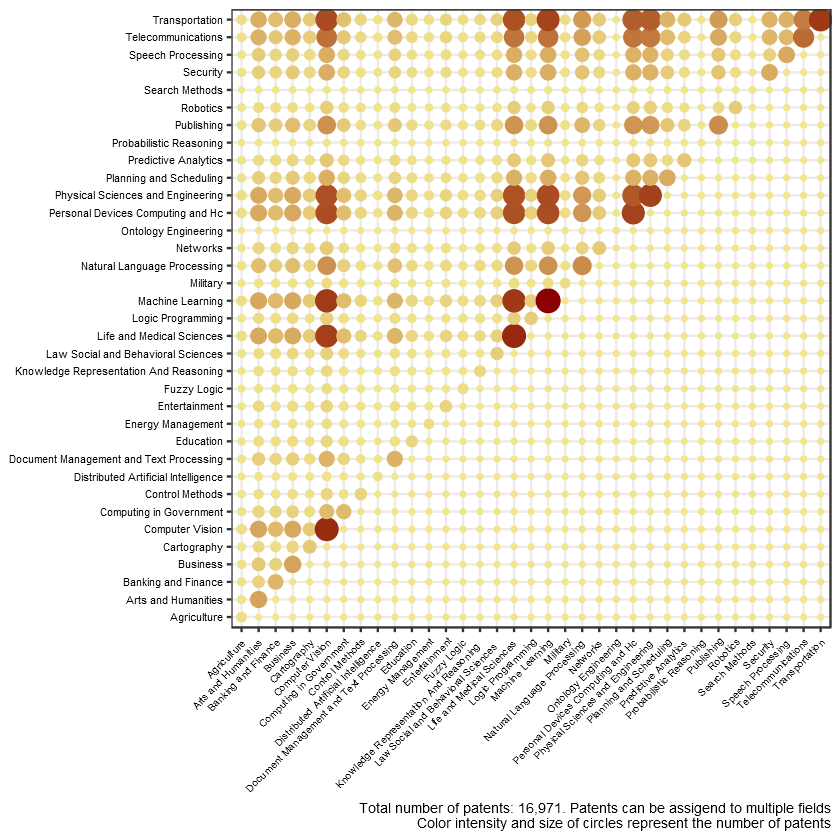

In [18]:
Field_Distribution_Graph <- ggplot(Patent_Field_Table, aes(x= H_Field, y=Field)) +
      labs(caption="Total number of patents: 16,971. Patents can be assigend to multiple fields\n Color intensity and size of circles represent the number of patents") + 
      geom_point(aes(colour=Number_Patents, size=Number_Patents)) +
      theme_bw() +
      theme(legend.position="none") + 
      scale_x_discrete(name=NULL) + 
      scale_y_discrete(name=NULL) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=6, color="black",angle=45, hjust=1)) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) +
      scale_color_gradient(low="khaki", high="darkred")
Field_Distribution_Graph

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Field_Distribution_Graph,
       filename="Field_Distribution_Graph.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=7.25,
       height=(7.25*0.75),
       units=c("in"),
       dpi=300)

## 1.3) GPT Distribution

### 1.3.1) GPT Market Cluster

Applied and Core AI distribution

In [19]:
Industrial_Patent_Dataset <- Industrial_Patent_Dataset[,Core_AI:=
                                                   ifelse(Industrial_Patent_Dataset[,Techniques] +
                                                                Industrial_Patent_Dataset[,Functional_Applications]>0,1,0)]

GPT_Scope_Analysis <- unique(Industrial_Patent_Dataset, by=c("Patent_number"))
GPT_Scope_Analysis <- table(GPT_Scope_Analysis$GPT_Scope)

GPT_Scope_Analysis


Applied_AI    Core_AI 
     16184        787 

Subset applications based on scope

In [20]:
Core_AI_Patents <- Industrial_Patent_Dataset[Core_AI==1,Patent_number]
Applied_AI_Patents <- Industrial_Patent_Dataset[Field_Applications==1,Patent_number]
length(Core_AI_Patents)
length(Applied_AI_Patents)

[1] 19173

[1] 18689

VennDiagram Core-Applied AI. Diagram available in "Charts/Final/Descriptive_Analysis"

In [21]:
venn.diagram(
      x=list(Core_AI_Patents,Applied_AI_Patents),
      fill=c("gray88", "deepskyblue4"),
      cex=0.75,
      alpha=c(1,1),
      category.names = c("Core AI", "Applied AI"),
      cat.default.pos ="outer",
      ext.length = rep(0.7,2),
      cat.pos = c(-150, 150),
      cat.distance = c(-10,-10),
      print.mode=c("raw","percent"),
      sigdigs=2,
      cat.col = c("black", "black"),
      cat.cex= c(0.8,0.8),
      width=5,
      height=5,
      units=c("in"),
      imagetype = "png",
      filename = "F:/Thesis/Charts/Final/Descriptive_Analysis\\Core-Applied_VennDiagramm.png",
      output = TRUE)

[1] 1

### 1.3.2) Distribution across Application Sectors

Select only Applied AI patent applications and remove duplicates

In [22]:
GPT_AS <- Industrial_Patent_Dataset[GPT_Scope=="Applied_AI"]
GPT_AS <- unique(GPT_AS, by=c("Patent_number"))
nrow(GPT_AS)

[1] 16184

Field Application columns are dummy variables. Sum columns by year. 
Reminder: a patent application can be assigend to more than one field

In [23]:
Field_Applications <- c("Agriculture","Arts and Humanities","Banking and Finance","Business","Cartography",
                        "Computing in Government","Document Management and Text Processing","Education",
                        "Energy Management","Entertainment","Law Social and Behavioral Sciences",
                        "Life and Medical Sciences", "Military","Networks","Personal Devices Computing and Hc",
                        "Physical Sciences and Engineering","Publishing","Security","Telecommunications",
                        "Transportation")

In [24]:
GPT_AS <- data.table(GPT_AS[, by = Year,
                            lapply(.SD, sum),
                            .SDcols = as.character(Field_Applications)])
head(GPT_AS,20)
dim(GPT_AS)

Year,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computing in Government,Document Management and Text Processing,Education,Energy Management,...,Law Social and Behavioral Sciences,Life and Medical Sciences,Military,Networks,Personal Devices Computing and Hc,Physical Sciences and Engineering,Publishing,Security,Telecommunications,Transportation
1978,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1981,0,1,1,1,0,1,1,0,0,...,0,1,0,0,1,1,0,0,0,0
1982,0,0,1,1,0,0,0,0,0,...,0,3,0,0,1,3,0,3,0,1
1983,0,1,0,0,0,0,1,0,0,...,0,3,0,0,2,0,1,0,0,2
1984,0,0,1,0,0,0,0,0,0,...,2,6,0,0,5,4,0,5,2,2
1985,0,2,2,0,0,2,0,1,0,...,1,5,0,0,5,5,6,3,0,4
1986,1,5,6,2,1,3,0,0,0,...,3,11,0,0,8,9,4,1,6,9
1987,1,5,8,3,0,2,1,1,0,...,4,11,0,0,7,11,6,2,5,4
1988,1,16,13,4,2,2,2,0,0,...,4,32,1,0,23,27,19,5,7,23
1989,0,17,9,3,2,5,3,3,0,...,6,54,2,0,40,41,16,8,11,36


[1] 39 21

Preparation data for chart

In [25]:
GPT_AS <- data.table(GPT_AS[, lapply(.SD, sum),
                            .SDcols= as.character(Field_Applications)])

GPT_AS <- GPT_AS[, Id:= ""]

GPT_AS <- melt(GPT_AS,
               id.vars = "Id",
               measure.vars = as.character(Field_Applications),
               variable.name = "Field",
               value.name = "Total_AS_Patents")

GPT_AS <- GPT_AS[,!"Id"]

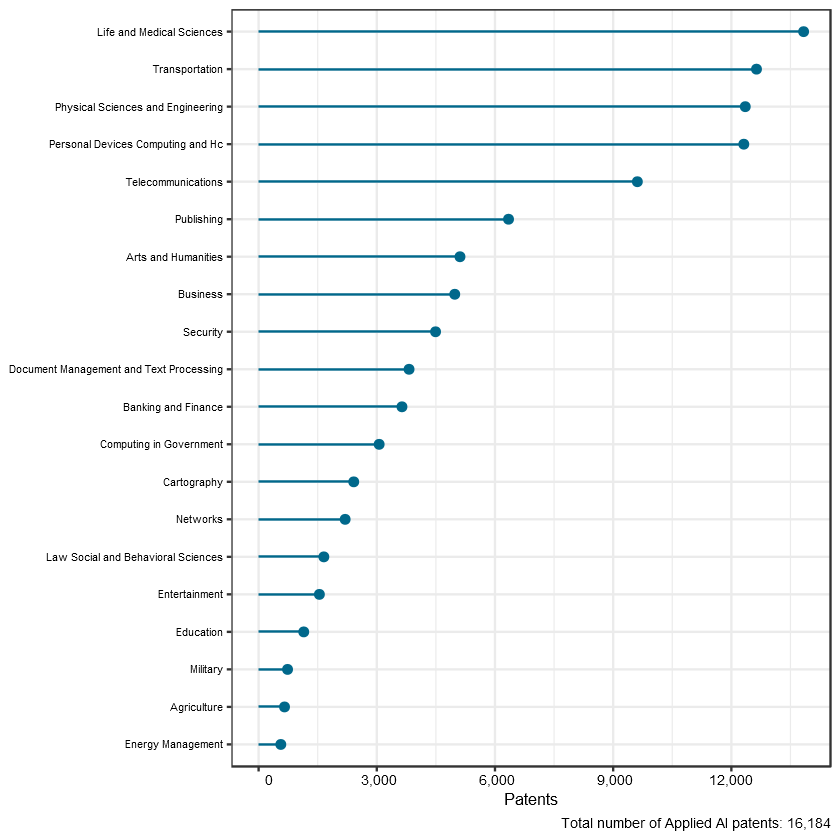

In [28]:
GPT_AS_Graph <- GPT_AS %>%
      mutate(Field=fct_reorder(Field,Total_AS_Patents)) %>%
      ggplot(aes(x=Field, y=Total_AS_Patents)) +
      geom_segment( aes(x=Field, xend=Field, y=0, yend=Total_AS_Patents), color="deepskyblue4") +
      geom_point(color="deepskyblue4", size=2, alpha=1) +
      labs(caption="Total number of Applied AI patents: 16,184") +
      scale_x_discrete(name=NULL) + 
      scale_y_continuous(name="Patents", breaks = seq(0,15000,3000),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) +
      theme(axis.title.x=element_text(size=10)) + 
      coord_flip()
GPT_AS_Graph

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=GPT_AS_Graph,
       filename="GPT_AS_Graph.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

## 1.4) Type of Applicant Analysis

Number of Applicants

In [29]:
N_Applicants <- length(unique(Industrial_Patent_Dataset$APPLICANT_MATCH_NAME))
N_Applicants

[1] 6807

Distribution of Applicants by Applicant Type

In [30]:
Distr_App_Type <- table((unique(Industrial_Patent_Dataset, by = "APPLICANT_MATCH_NAME"))$Applicant_Type)
Distr_App_Type

#Proportional
Distr_App_Type_Relative <- round(prop.table(table((unique(Industrial_Patent_Dataset, by = "APPLICANT_MATCH_NAME")$Applicant_Type))),2)
Distr_App_Type_Relative

#Consistency check
sum(Distr_App_Type)-N_Applicants


          Enterprise             Inventor Research Institution 
                5675                   49                 1083 


          Enterprise             Inventor Research Institution 
                0.83                 0.01                 0.16 

[1] 0

Distribution of Patent Applications by Type of Applicants

In [31]:
Distr_App_Type2 <- table(Industrial_Patent_Dataset$Applicant_Type)
Distr_App_Type2

#Proportional
Distr_App_Type2_Relative <- round(prop.table(table(Industrial_Patent_Dataset$Applicant_Type)),2)
Distr_App_Type2_Relative

#Consistency Check
sum(Distr_App_Type2)-nrow(Industrial_Patent_Dataset)



          Enterprise             Inventor Research Institution 
               16806                   63                 2733 


          Enterprise             Inventor Research Institution 
                0.86                 0.00                 0.14 

[1] 0

Evolution over time

In [32]:
ByYear_App_Type <- Industrial_Patent_Dataset[, .N, by = c("Year", "Applicant_Type")]
ByYear_App_Type <-ByYear_App_Type[order(ByYear_App_Type[,"Year"]),]
colnames(ByYear_App_Type)[3] <- "Number_Applicants"
head(ByYear_App_Type)

Year,Applicant_Type,Number_Applicants
1978,Enterprise,1
1981,Enterprise,1
1982,Enterprise,6
1983,Enterprise,2
1983,Research Institution,1
1984,Enterprise,13


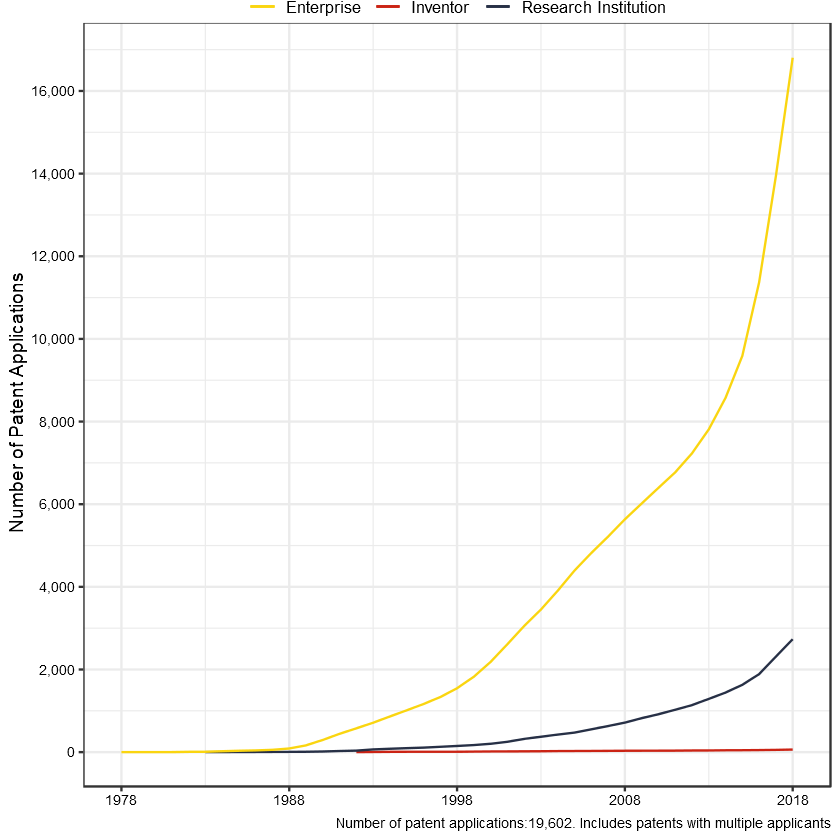

In [33]:
App_Type_Trend <- ggplot(ByYear_App_Type, aes(x = Year, y = cumsum(Number_Applicants))) + 
      labs(caption="Number of patent applications:19,602. Includes patents with multiple applicants") + 
      geom_line(aes(color="Inventor"),ByYear_App_Type %>% filter(Applicant_Type=="Inventor")) +
      geom_line(aes(color="Research Institution"),ByYear_App_Type %>% filter(Applicant_Type=="Research Institution")) +
      geom_line(aes(color="Enterprise"),ByYear_App_Type %>% filter(Applicant_Type=="Enterprise")) +
      theme_bw() +
      theme(legend.position="top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10)) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(legend.text = element_text(size=10)) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) +
      scale_x_continuous(name=NULL, limits = c(1977.75,2018.25), breaks=seq(1978,2018,10)) + 
      scale_y_continuous(name="Number of Patent Applications", 
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE),
                         breaks = seq(0,17000,2000)) +
      scale_color_manual(values=wes_palette(n=3, name="BottleRocket2"))
App_Type_Trend  

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=App_Type_Trend,
       filename="App_Type_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1.25,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 1.5) Industrial Characteristics of Enterprise Applicants

In [34]:
Founding_Year_Analysis <- Industrial_Patent_Dataset[Applicant_Type=="Enterprise" & !is.na(YEAR_FOUNDED),]
Founding_Year_Analysis <- unique(Founding_Year_Analysis, by=c("APPLICANT_MATCH_NAME"))

# Number of Enteprise Applicants for which Industrial chatacteritics was found
nrow(Founding_Year_Analysis) 

[1] 2862

### 1.5.1) Founding Year of Enterprise Applicants

Descriptive Statistics

In [35]:
summary(Founding_Year_Analysis$YEAR_FOUNDED)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1811    1982    2000    1987    2010    2018 

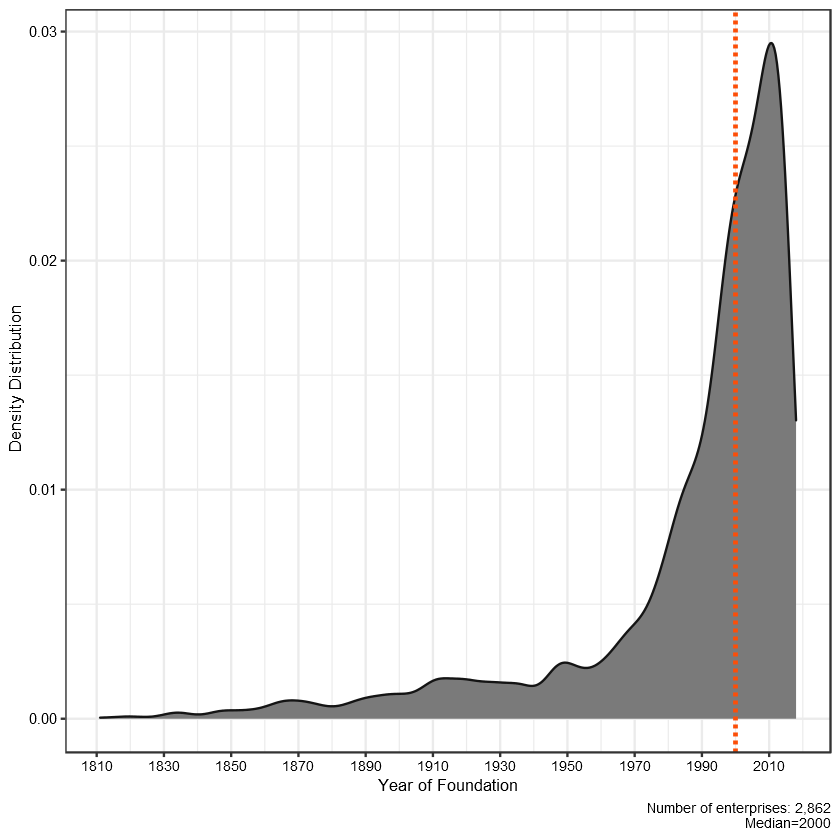

In [36]:
Distribution_Year_Founded <- ggplot(Founding_Year_Analysis, aes(x=YEAR_FOUNDED)) +
      labs(caption="Number of enterprises: 2,862\n Median=2000") + 
      geom_density(alpha=1,colour="gray8", fill="gray48") + 
      geom_vline(aes(xintercept = median(YEAR_FOUNDED)), color = "#FC4E08", linetype = "dashed", size = 1) + 
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans", size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans", color="black")) + 
      theme(axis.title.y=element_text(size=10)) +
      theme(axis.title.x=element_text(size=10)) + 
      scale_x_continuous(name="Year of Foundation", limits = c(1811,2018), breaks=seq(1810,2020,20)) + 
      scale_y_continuous(name="Density Distribution",  breaks = seq(0,0.04,0.01))
Distribution_Year_Founded

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Distribution_Year_Founded,
       filename="Distribution_Year_Founded.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1.25,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

### 1.5.2) Applicant Age

Number of Applications with available information about enterprise age when filing application

In [37]:
Applications_w_Age <- nrow(Industrial_Patent_Dataset[is.na(Applicant_Age)==FALSE,])
Applications_w_Age

[1] 10442

In [38]:
summary(Industrial_Patent_Dataset$Applicant_Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    8.00   24.00   40.81   59.00  199.00    9160 

In [39]:
Applicant_Age_Analysis <- Industrial_Patent_Dataset[is.na(Applicant_Age)==FALSE]
#Number of Applications
nrow(Applicant_Age_Analysis)

#Number of Applicants
length(unique(Applicant_Age_Analysis$APPLICANT_MATCH_NAME))

[1] 10442

[1] 2862

In [40]:
summary(Applicant_Age_Analysis$Applicant_Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   24.00   40.81   59.00  199.00 

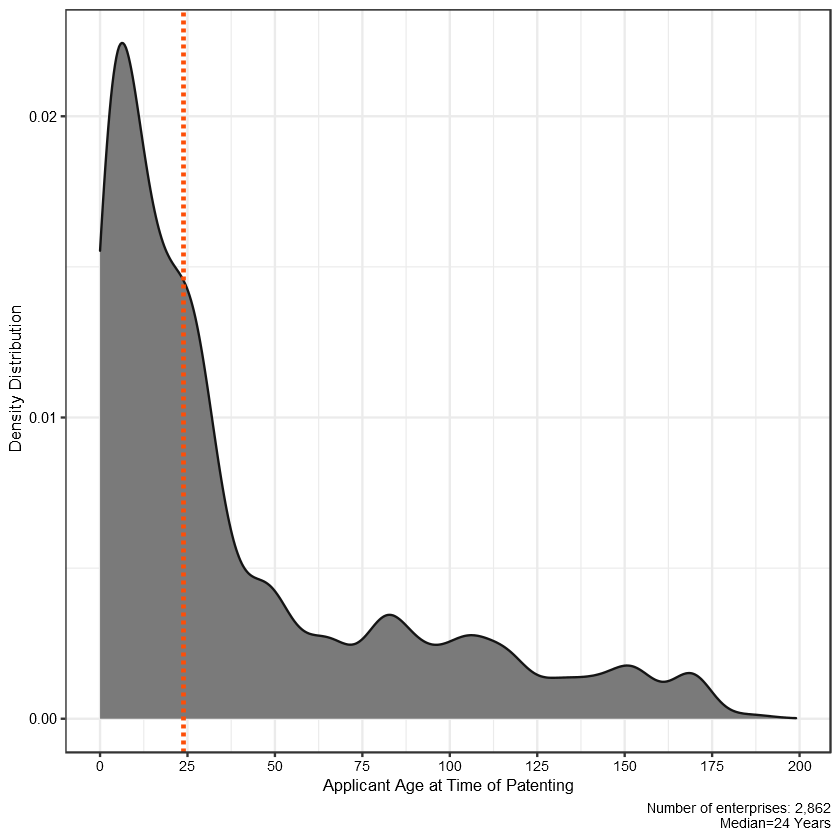

In [41]:
Applicant_Age_Distribution <- ggplot(Applicant_Age_Analysis, aes(x=Applicant_Age)) +
      labs(caption="Number of enterprises: 2,862\n Median=24 Years") + 
      geom_density(alpha=1,colour="gray8", fill="gray48") + 
      geom_vline(aes(xintercept = median(Applicant_Age)), color = "#FC4E08", linetype = "dashed", size = 1) + 
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans", size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans", color="black")) + 
      scale_x_continuous(name="Applicant Age at Time of Patenting", breaks=seq(0,200,25)) + 
      scale_y_continuous(name="Density Distribution",  breaks = seq(0,0.04,0.01))+
      theme(axis.title.y=element_text(size=10)) +
      theme(axis.title.x=element_text(size=10))
Applicant_Age_Distribution

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Applicant_Age_Distribution,
       filename="Applicant_Age_Distribution.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1.25,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

Distribution based on Matching Method

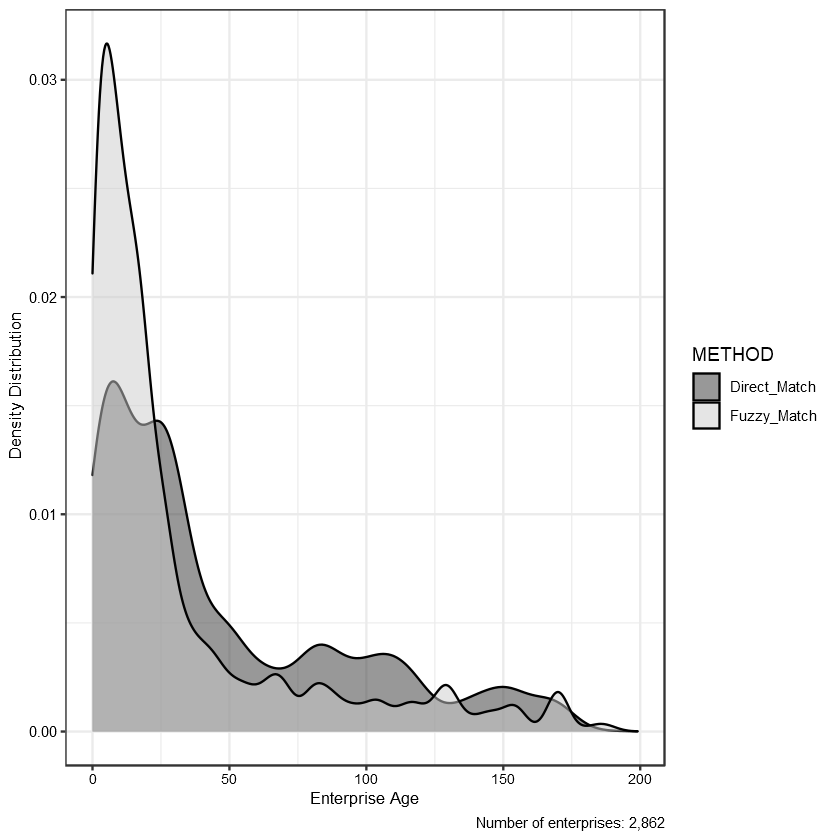

In [42]:
Applicant_Age_Distribution_Method <- ggplot(Applicant_Age_Analysis, aes(x=Applicant_Age, fill=METHOD)) +
      geom_density(alpha=0.5) + 
      labs(caption="Number of enterprises: 2,862") + 
      scale_fill_grey()  +
      theme_bw() +
      theme(axis.text.x = element_text(family="sans", size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans", color="black")) + 
      scale_x_continuous(name="Enterprise Age") + 
      scale_y_continuous(name="Density Distribution",  breaks = seq(0,0.04,0.01))+
      theme(axis.title.y=element_text(size=10)) +
      theme(axis.title.x=element_text(size=10))  
Applicant_Age_Distribution_Method

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Applicant_Age_Distribution_Method,
       filename="Applicant_Age_Distribution_Method.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1.25,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

### 1.5.3) Size Range Distribution

In [43]:
Size_Range_Distribution <- unique(Founding_Year_Analysis, by=c("APPLICANT_MATCH_NAME"))
Size_Range_Distribution <- data.table(table(Size_Range_Distribution$SIZE_RANGE))
colnames(Size_Range_Distribution) <- c("SIZE_RANGE", "Number_Enterprises")

#Adjust Factor and Level
Size_Range_Distribution$SIZE_RANGE <- factor(Size_Range_Distribution$SIZE_RANGE,
                                             levels = c(">10000","5001-10000", "1001-5000","501-1,000",
                                                       "201-500","51-200", "11-50","1-10"))

setorder(Size_Range_Distribution,SIZE_RANGE)
Size_Range_Distribution

#Consistency Check
sum(Size_Range_Distribution$Number_Enterprises)

SIZE_RANGE,Number_Enterprises
>10000,191
5001-10000,91
1001-5000,223
"501-1,000",102
201-500,191
51-200,474
11-50,696
1-10,894


[1] 2862

Relative Distribution

In [44]:
Size_Range_Distribution <- Size_Range_Distribution[,Share:= Number_Enterprises/sum(Number_Enterprises)]

head(Size_Range_Distribution,10)

sum(Size_Range_Distribution$Share)

SIZE_RANGE,Number_Enterprises,Share
>10000,191,0.06673655
5001-10000,91,0.03179595
1001-5000,223,0.07791754
"501-1,000",102,0.03563941
201-500,191,0.06673655
51-200,474,0.16561845
11-50,696,0.24318658
1-10,894,0.31236897


[1] 1

Visual Representation

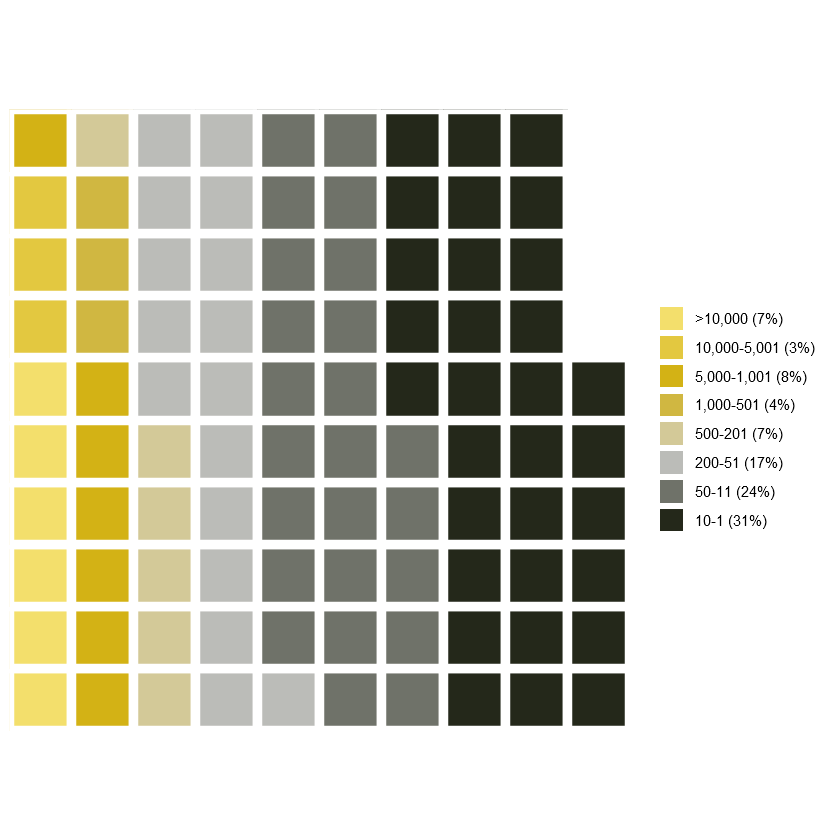

In [45]:
Size_Range_Distribution_Boxes <-(Size_Range_Distribution$Number_Enterprises/sum(Size_Range_Distribution$Number_Enterprises))*100

Chart_names <- sprintf("%s (%s)", c(">10,000","10,000-5,001", "5,000-1,001","1,000-501",
                                                       "500-201","200-51", "50-11","10-1"),
                      scales::percent(Size_Range_Distribution_Boxes/sum(Size_Range_Distribution_Boxes)))
names(Size_Range_Distribution_Boxes) <- Chart_names

Size_Range_Distribution_Chart <- waffle::waffle(Size_Range_Distribution_Boxes,
                                                colors = (wes_palette(n=8, name="Moonrise1",type = "continuous")))
Size_Range_Distribution_Chart


Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Size_Range_Distribution_Chart,
       filename="Size_Range_Distribution_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)  

### 1.5.4) Relationship of Age and Size

In [46]:
Age_Size <- Industrial_Patent_Dataset[is.na(SIZE_RANGE)==FALSE & 
                                       Applicant_Age>-1,]
unique(Age_Size$SIZE_RANGE)

[1] ">10000"     "51-200"     "501-1,000"  "5001-10000" "11-50"     
[6] "1001-5000"  "1-10"       "201-500"

In [47]:
Age_Size <- Age_Size[, .(SIZE_RANGE, Applicant_Age)]

Age_Size$SIZE_RANGE <- factor(Age_Size$SIZE_RANGE, levels =c("1-10","11-50","51-200","201-500",
                                                             "501-1,000","1001-5000","5001-10000",">10000"))
                                                              
table(Age_Size$SIZE_RANGE)


      1-10      11-50     51-200    201-500  501-1,000  1001-5000 5001-10000 
      2465       1542       1374        456        463        732        417 
    >10000 
      2993 

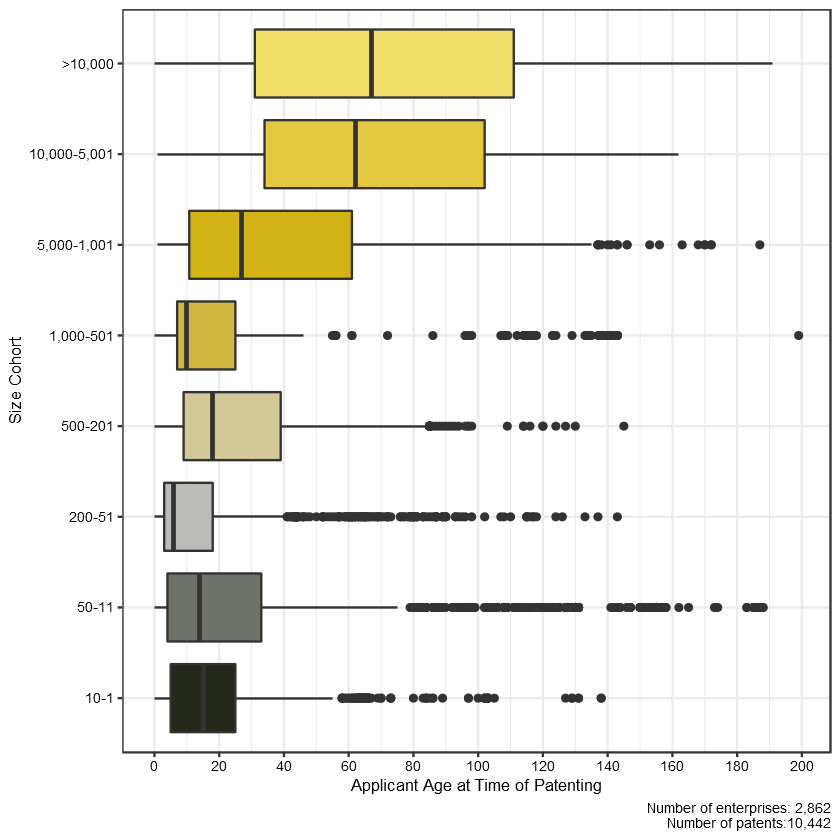

In [48]:
Boxplot_Age_Size<- ggplot(Age_Size, aes(x=SIZE_RANGE, y=Applicant_Age, fill=SIZE_RANGE)) + 
      geom_boxplot() +
     labs(caption="Number of enterprises: 2,862\n Number of patents:10,442") +
      theme_bw() + 
      theme(legend.position="none",legend.title=element_blank(),legend.text = element_text(size=6),
            legend.key = element_rect(size = 1)) + 
      guides(col = guide_legend(ncol = 4)) +
      scale_x_discrete(name="Size Cohort",labels=c("10-1","50-11","200-51","500-201",
                                         "1,000-501","5,000-1,001","10,000-5,001",">10,000")) + 
      scale_y_continuous(name="Applicant Age at Time of Patenting", breaks=seq(0,200,20)) + 
      scale_fill_manual(values=rev(wes_palette(n=8, name="Moonrise1",type = "continuous"))) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.title.x=element_text(size=10)) + 
      theme(axis.title.y=element_text(size=10)) + 
      coord_flip()
Boxplot_Age_Size

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Boxplot_Age_Size,
       filename="Boxplot_Age_Size.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1.25,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

# 2) Enterpreneurial Dataset

## 2.0) Input

In [49]:
Entrepreneurial_Dataset <- fread("Entrepreneurial_Dataset.csv", stringsAsFactors = FALSE, na.strings="")
sapply(Entrepreneurial_Dataset,class)

Cluster                 Field         Justification 
          "character"           "character"           "character" 
Original_Venture_Name       Year_Foundation      Alternative_Name 
          "character"             "integer"           "character" 
           EVENT_TYPE        FUNDING_IN_USD             COUNTRIES 
          "character"             "numeric"           "character" 
YEAR_OF_FUNDING_EVENT            Clean_Name             GPT_Scope 
            "integer"           "character"           "character" 
          Venture_Age 
            "integer"

## 2.1) Startups Foundation per Year

In [50]:
summary(Entrepreneurial_Dataset$Year_Foundation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1801    2012    2014    2013    2016    2019 

In [51]:
setorder(Entrepreneurial_Dataset,Year_Foundation)
Foundation_Year_Analysis <-unique(Entrepreneurial_Dataset, by=c("Original_Venture_Name"))

#Total Number of startups
Total_Startups<- nrow(Foundation_Year_Analysis)
Total_Startups

#Number Startups with Founding Year available
Startups_w_FY <- Foundation_Year_Analysis[!is.na(Year_Foundation)]
nrow(Startups_w_FY)

[1] 5719

[1] 5719

New Startups per Year

In [52]:
Foundation_Year_Analysis <- Startups_w_FY[, .N, by=c("Year_Foundation")]
colnames(Foundation_Year_Analysis)[2] <- "Number_Startups"
tail(Foundation_Year_Analysis,10)

Year_Foundation,Number_Startups
2010,162
2011,237
2012,389
2013,505
2014,700
2015,875
2016,989
2017,752
2018,364
2019,61


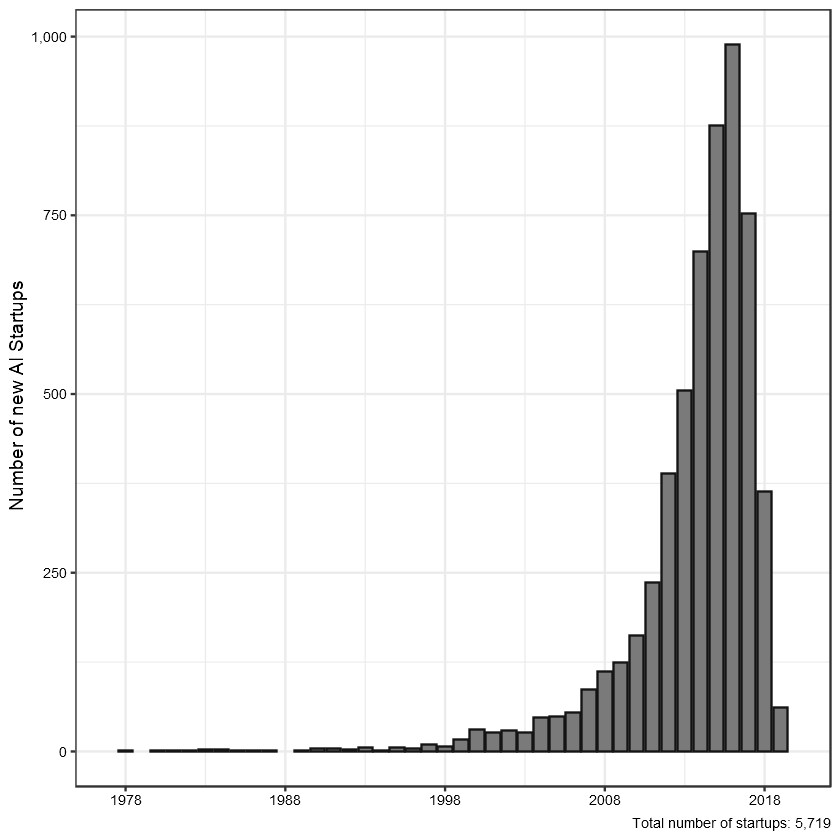

In [53]:
Foundation_Distribution <- ggplot(Foundation_Year_Analysis, aes(x=Year_Foundation, y=Number_Startups)) +
      labs(caption="Total number of startups: 5,719") +
      geom_bar(stat="identity", colour="gray8", fill="gray48") +
      scale_x_continuous(name=NULL, limits = c(1977,2020), breaks=seq(1978,2019,10)) + 
      scale_y_continuous(name="Number of new AI Startups",
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
      theme_bw() +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Foundation_Distribution

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Foundation_Distribution,
       filename="Foundation_Distribution.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.2) Age of Startups when Receiving Funding

Create column with the age at time of funding

In [54]:
Venture_Age_Funding <- Entrepreneurial_Dataset[, keyby= .(YEAR_OF_FUNDING_EVENT), 
                                               .(Median_Age= median(Venture_Age, na.rm=TRUE ))]

Venture_Age_Funding

YEAR_OF_FUNDING_EVENT,Median_Age
2009,2
2010,3
2011,3
2012,2
2013,2
2014,2
2015,2
2016,2
2017,2
2018,3


In [55]:
setorder(Venture_Age_Funding, YEAR_OF_FUNDING_EVENT)

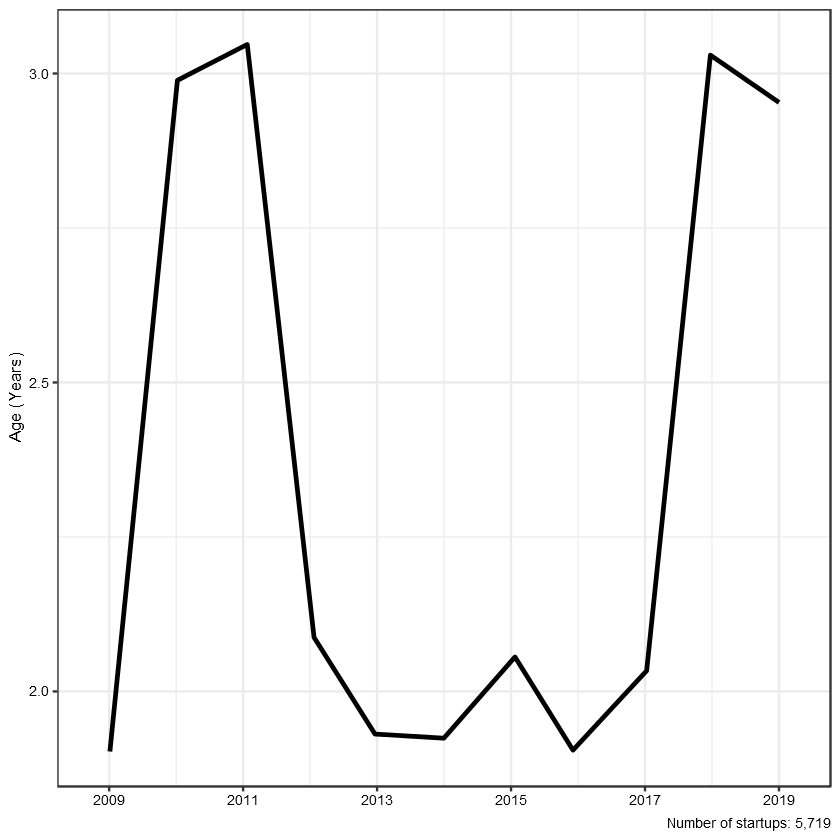

In [57]:
Venture_Age_Funding_Trend <- ggplot(Venture_Age_Funding, aes(x = YEAR_OF_FUNDING_EVENT, y = Median_Age)) + 
      geom_line(position=position_jitter(w=0.1, h=0.1), size=1) +
      labs(caption="Number of startups: 5,719") +
      scale_y_continuous(name="Age (Years)", breaks=seq(0,4,0.5)) +
      scale_x_continuous(name=NULL, breaks=seq(2009,2019,2), limits = c(2008.75,2019.25))+
      theme_bw()+
      theme(legend.position = "top", legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10)) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Venture_Age_Funding_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Venture_Age_Funding_Trend,
       filename="Venture_Age_Funding_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.3) Distribution of Startups across Fields

In [59]:
Field_Distribution <- unique(Entrepreneurial_Dataset, by=c("Original_Venture_Name"))
nrow(Field_Distribution)

Field_Distribution <- Field_Distribution[,.N, by=c("Field")]
colnames(Field_Distribution)[2] <- "Number_Startups"

head(Field_Distribution)

[1] 5719

Field,Number_Startups
Natural Language Processing,344
Robotics,152
Miscellaneous,235
Business,1366
Industry and Manufacturing,205
Security,509


Concentration measurement: share of three sectors with most startups with respect to toal number

In [60]:
setorder(Field_Distribution, -Number_Startups)

Top_3_Rate <- sum(Field_Distribution[1:3,Number_Startups])/sum(Field_Distribution$Number_Startups)
Top_3_Rate

[1] 0.4831264

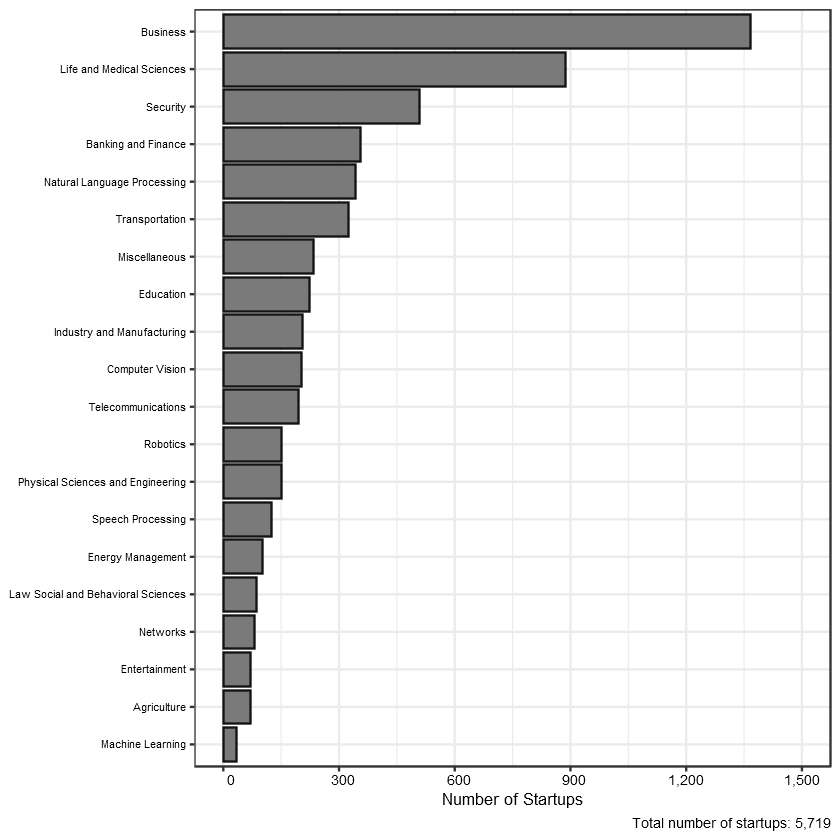

In [61]:
Field_Distr_Graph <- Field_Distribution %>%
      mutate(Field=fct_reorder(Field,Number_Startups)) %>%
      ggplot(aes(x=Field, y=Number_Startups)) +
      geom_bar(stat="identity", colour="gray8", fill="gray48") +
      labs(caption="Total number of startups: 5,719") +
      theme_bw() +
      scale_x_discrete(name=NULL) + 
      scale_y_continuous(name="Number of Startups", limits=c(0,1500), breaks = seq(0,1500,300),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) + 
      theme(axis.title.x=element_text(size=10)) +
      coord_flip()
Field_Distr_Graph

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Field_Distr_Graph,
       filename="Field_Distr_Graph.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.4) GPT Distribution

In [62]:
GPT_Distr_Found <- unique(Entrepreneurial_Dataset, by=c("Original_Venture_Name"))
GPT_Distr_Found <- GPT_Distr_Found[, .N, by=c("GPT_Scope")]
colnames(GPT_Distr_Found)[2] <- "Number_Startups"

head(GPT_Distr_Found)

GPT_Scope,Number_Startups
Core_AI,1062
Other,235
Applied_AI,4422


In [63]:
GPT_Distr_Found <- GPT_Distr_Found[, Share := Number_Startups/sum(Number_Startups)]
head(GPT_Distr_Found)

GPT_Scope,Number_Startups,Share
Core_AI,1062,0.1856968
Other,235,0.0410911
Applied_AI,4422,0.7732121


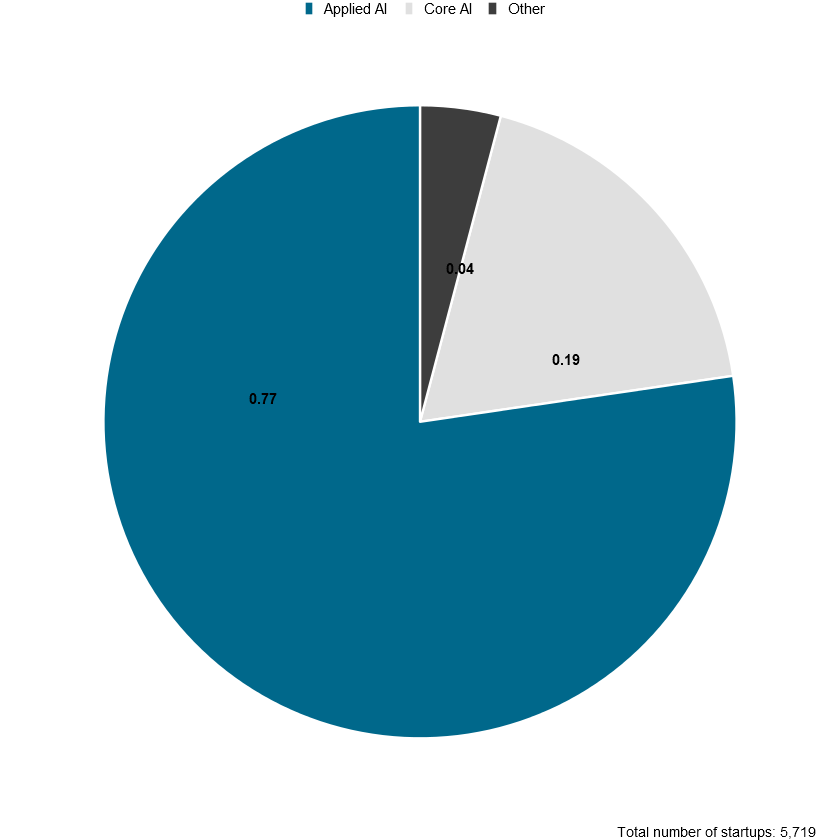

In [66]:
GPT_Distr_Found_Chart <- ggplot(GPT_Distr_Found, aes(x="", y=Number_Startups, fill=GPT_Scope)) +
      geom_bar(stat="identity", width=1, color="white") +
      coord_polar("y", start=0) +
      labs(caption="Total number of startups: 5,719") +
      theme_void() +
      theme(legend.position="top", legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(0,0,0,0),legend.key.size=unit("0.25","cm")) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      geom_text(aes(label = round(Share,2)), color = "black", size=3, fontface ="bold") +
      scale_fill_manual(values = c("deepskyblue4", "gray88", "gray24"), 
                        labels = c("Applied AI", "Core AI", "Other"))
GPT_Distr_Found_Chart

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=GPT_Distr_Found_Chart,
       filename="GPT_Distr_Found_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Descriptive_Analysis",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)